# CREDIT LOAN RISK MANAGEMENT WITH LOGISTICS REGRESSION

In [4]:
pip install "notebook>=5.3" "ipywidgets>=7.5"

Note: you may need to restart the kernel to use updated packages.


In [57]:
import numpy as np    # increases efficiency of matrix operations
import pandas as pd   # reads in data files of mixed data types
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [58]:
# The descriptions for the data features 
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [59]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [60]:
# we can fetch each feature description with these set of codes
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [61]:
print(data_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [62]:
# we can fetch each feature description with these set of codes
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [63]:
# for instance, we want to know what information is stored in 'mort_acc' ?
feat_info('mort_acc')

Number of mortgage accounts.


In [64]:
feat_info('application_type') 

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [65]:
# we want to import the data and save on data_lc
data_lc = pd.read_csv('lending_club_loan_two.csv')

In [66]:
data_lc.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [67]:
# quick info about the features and the data types. We notice several missing data from different features.
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# DATA EXPLORATORY ANALYSIS 
Our aim here is to get a prior understanding of that data for which variables are important, view summary statistics, and perform proper data visualization for better understanding.

In [68]:
#get the statistical summaries of our data

data_lc.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


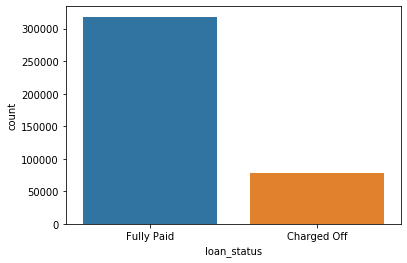

In [69]:
# We want to explore the counts for the loan status, to have a view of the number of entries in the data set that are fully-paid or charged-off
sns.countplot(x='loan_status',data = data_lc)

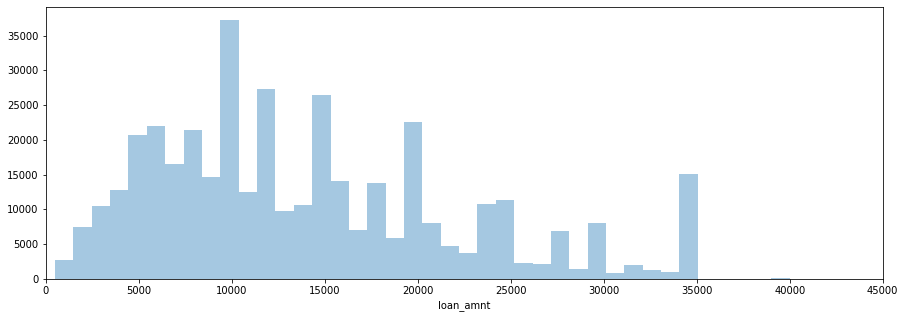

In [70]:
# Create a histogram/distribution plot of the loan_amnt column
plt.figure(figsize=(15,5))
plt.xlim(0,45000)
sns.distplot(data_lc['loan_amnt'],kde=False,bins=40)


{'whiskers': [<matplotlib.lines.Line2D at 0x27d18ea1988>,
 'caps': [<matplotlib.lines.Line2D at 0x27d18ea1b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d18e9bf08>],
 'medians': [<matplotlib.lines.Line2D at 0x27d18ea5ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d18ea9f08>],
 'means': []}

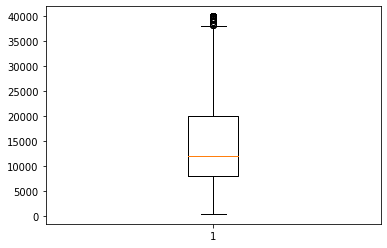

In [71]:
plt.boxplot(data_lc['loan_amnt'])

In [72]:
print(data_lc['loan_amnt'].max())
print(data_lc['loan_amnt'].min())

40000.0
500.0


In [73]:
def nonrepeating(st):
    if len(st)==0 or len(st) is None:
        return None
    dictnary = {}
    for i in st:
        if i in dictnary:
            dictnary[i]+=1
        else:
            dictnary[i]=1
    for key in dictnary:
        if dictnary[key] == 1:
            print(key,":", dictnary[key])
st = data_lc['loan_amnt']            
nonrepeating(st)

900.0 : 1
36225.0 : 1
38225.0 : 1
39700.0 : 1
800.0 : 1
700.0 : 1
37900.0 : 1
35475.0 : 1
34125.0 : 1
38475.0 : 1
750.0 : 1
39500.0 : 1
32925.0 : 1
31875.0 : 1
39600.0 : 1
37800.0 : 1
36525.0 : 1
39475.0 : 1
36625.0 : 1
38825.0 : 1
35875.0 : 1
37450.0 : 1
35525.0 : 1
32575.0 : 1
950.0 : 1
30050.0 : 1
30675.0 : 1
38300.0 : 1
30775.0 : 1
35075.0 : 1
36775.0 : 1
38275.0 : 1
35500.0 : 1
39200.0 : 1
38750.0 : 1
36275.0 : 1
36475.0 : 1
725.0 : 1


In [74]:
#We want to see the relationship between the features by calculating correlation between the continuous feature variables.

data_lc.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


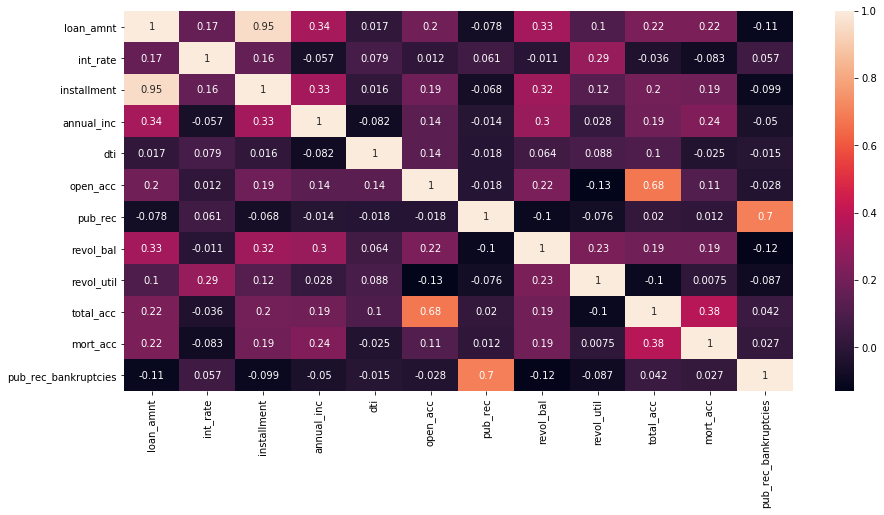

In [75]:
plt.figure(figsize=(15,7))
sns.heatmap(data_lc.corr(),annot=True)
#plt.ylim(10, 0)

In [76]:
# Going forward there seems a stronger correlation between instalment and loan_amount, we will explore these two features further.
# This correlation make sense when we check the descriptions of these features

print(feat_info('loan_amnt'))

print(feat_info('installment'))

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
None
The monthly payment owed by the borrower if the loan originates.
None


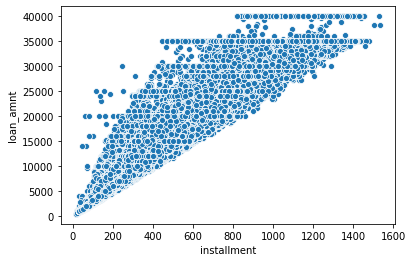

In [77]:
#we can explore further with the scatter plot
sns.scatterplot(x='installment',y='loan_amnt',data=data_lc)

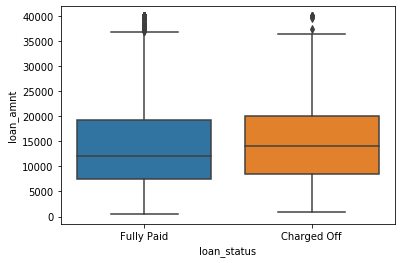

In [78]:
# let's Create a boxplot to explore the relationship between the loan_status and the Loan Amount.
#We see an indication that the average loan amount for charged off customers is higher
sns.boxplot(x='loan_status',y='loan_amnt',data=data_lc)

In [79]:
#We Calculate the summary statistics for the loan amount, grouped by the loan_status to see the boxplot clearly.
data_lc.groupby('loan_status')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [80]:
#Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. 
#What will be able to the unique possible grades and subgrades.
sorted(data_lc['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [81]:
sorted(data_lc['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

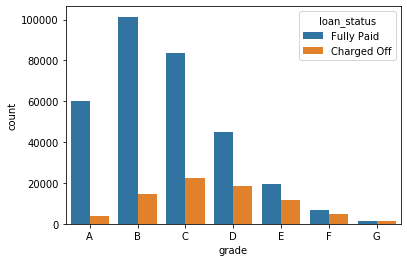

In [82]:
# let's create a countplot per grade. Set the hue to the loan_status label.
grade_order = sorted(data_lc['grade'].unique())
sns.countplot(x='grade',data=data_lc,hue='loan_status', order = grade_order)

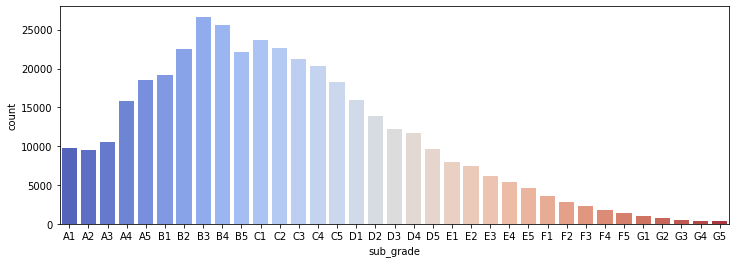

In [83]:
#let's explore the sub_grades 
plt.figure(figsize=(12,4))
subgrade_order = sorted(data_lc['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data_lc,order = subgrade_order,palette='coolwarm')

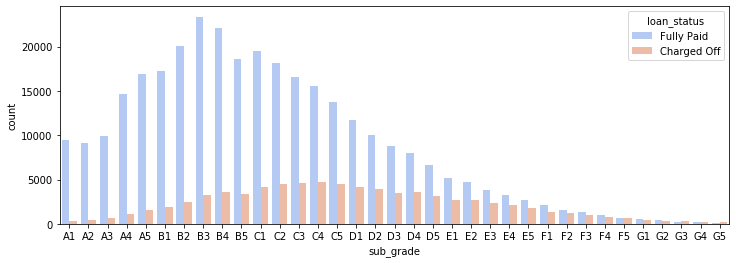

In [84]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(data_lc['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data_lc, order = subgrade_order,palette='coolwarm' ,hue='loan_status')

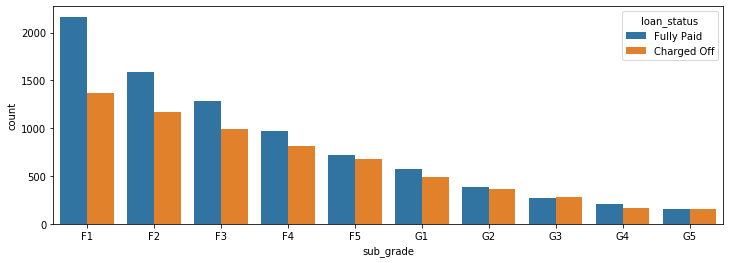

In [85]:
#Above exploration indicates F and G subgrades don't get paid back that often. 
#Let's explore further by Isloating them and recreate the countplot just for those subgrades.

f_and_g = data_lc[(data_lc['grade']=='G') | (data_lc['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data= f_and_g, order = subgrade_order,hue='loan_status')

In [86]:
# We want to create a new column called 'load_repaid' that will replicate loan_status features 
# but status will be converted to dummy variables,"Fully Paid" as 1 and "Charged Off" as 0.

data_lc['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [87]:
data_lc['loan_repaid'] = data_lc['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [88]:
data_lc[['loan_repaid','loan_status']].head(10)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid
7,1,Fully Paid
8,1,Fully Paid
9,1,Fully Paid


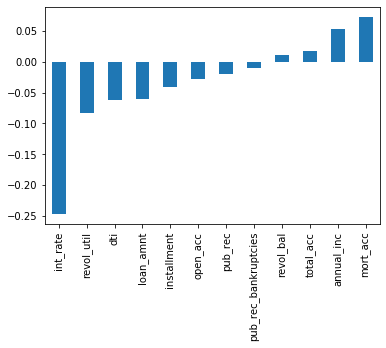

In [89]:
#Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.
data_lc.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data PreProcessing__ Dealing With Missing Data

* Remove or fill any missing data. 
* Remove unnecessary or repetitive features. 
* Convert categorical string features to dummy variables.

In [90]:
#Quick Data Overview
data_lc.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [91]:
#We explore the data for the missing data and decide if they are useful to determine whether to keep, fill-in, or discard them
# length of the dataframe

len(data_lc)

396030

In [92]:
#Check for missing data counts
data_lc.isnull().head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
# we get the sum of the missing data in each column.
data_lc.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [94]:
#We check the proportion of the missing data in each column.

100 * data_lc.isnull().sum()/len(data_lc)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [95]:
#We'll examine the features and the info to determine how to treat the missing data.
#The columns with missing data
#_ emp_title 
#_ emp_length
#_ title
#_ revol_util
#_ mort_acc
#_ pub_rec_bankruptcies

feat_info('emp_title')
print('\n')
feat_info('emp_length')
print('\n')
feat_info('title')
print('\n')
feat_info('revol_util')
print('\n')
feat_info('mort_acc')
print('\n')
feat_info('pub_rec_bankruptcies')


The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


The loan title provided by the borrower


Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Number of mortgage accounts.


Number of public record bankruptcies


In [96]:
# exploring the 'emp_title' feature.
#find the how many unique 'emp_title' in the data.
data_lc['emp_title'].nunique()

173105

In [97]:
#how many counts of entries are in each emp_title.
data_lc['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
HB Staffing                                    1
Fresinius Medical Care                         1
Mechanical Carman                              1
Human resources manager                        1
Appling County Bd of Ed/Oak View Bapt Ch       1
Name: emp_title, Length: 173105, dtype: int64

In [98]:
#we can decide to remove that emp_title column since it appears there are too many unique job titles
#to try to convert this to a dummy variable feature and almost half of the people have unique job titles, seems not very informative.

data_lc = data_lc.drop('emp_title', axis=1)

In [99]:
# exploring the 'emp_title' feature.
#check the unique 'emp_length' in the data.

sorted(data_lc['emp_length'].dropna().unique())


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [100]:
#re-ordering the 'emp_length'
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

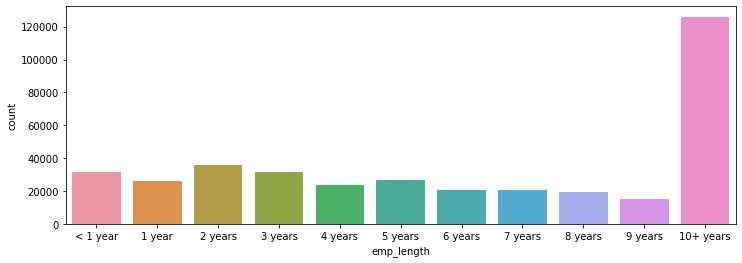

In [101]:
#Create a count plot of the emp_length feature column.

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data_lc,order=emp_length_order)

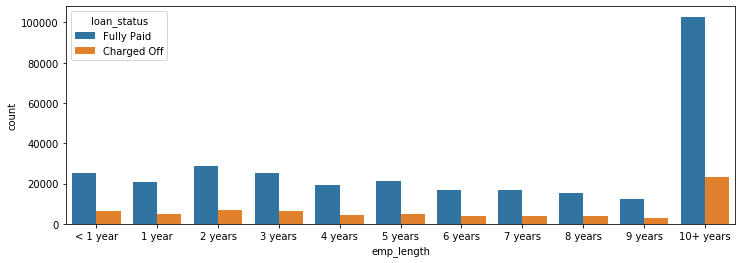

In [102]:
#Plot out the countplot with a hue to separate Fully Paid vs Charged Off
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data_lc,order=emp_length_order, hue = 'loan_status')

In [103]:
#This still doesn't really inform us if there is a strong relationship between employment length and being charged off, 
#We want the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. 
#There are a multitude of ways to create this Series.

In [104]:
#We would calculate the ratio of charged off to fully paid
emp_chargedOff = data_lc[data_lc['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [105]:
emp_fullyPaid = data_lc[data_lc['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [106]:
emp_lenProp = emp_chargedOff/emp_fullyPaid
print(emp_lenProp)

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64


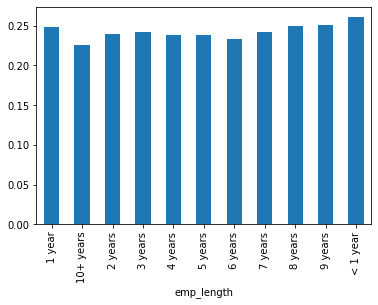

In [107]:
emp_lenProp.plot(kind='bar')

In [108]:
#Charged off rates are extremely similar across all employment lengths.
#let's drop the emp_length column.
data_lc = data_lc.drop('emp_length',axis=1)

In [109]:
# Exploring the 'title' column
# Review the title column vs the purpose column. Is this repeated information?
print(data_lc['purpose'].head(10))

print(feat_info('purpose'))

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object
A category provided by the borrower for the loan request. 
None


In [110]:
print(data_lc['title'].head(10))

print(feat_info('title'))

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object
The loan title provided by the borrower
None


In [111]:
#The title column is simply a string subcategory/description of the purpose column.
#make sense to drop this column

data_lc = data_lc.drop('title',axis=1)

In [112]:
#lastly, we need to explore the 'mort_acc' to determine how to handle the missing data

feat_info('mort_acc')

Number of mortgage accounts.


In [113]:
#Create a value_counts of the mort_acc column.

data_lc['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [114]:
#'mort_acc' has about the highest proportion of missing data, we should fill-in the missing
#We could compare this column with any strong correlated column
#we could find the mean of the correlated column and fill-in the missng values in 'mort_acc'

print("Correlation with the mort_acc column")
data_lc.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [115]:
#The total_acc has the strongest correlation with 'mort_acc'
#let's fill-in the missing the data with the average of 'total_acc'
#call the total_acc_avg that corresponds to 'mort_acc' column

print("Mean of mort_acc column per total_acc")
data_lc.groupby('total_acc').mean()['mort_acc'].head(20)

Mean of mort_acc column per total_acc


total_acc
2.0     0.000000
3.0     0.052023
4.0     0.066743
5.0     0.103289
6.0     0.151293
7.0     0.221695
8.0     0.308422
9.0     0.365499
10.0    0.429158
11.0    0.526570
12.0    0.618034
13.0    0.722124
14.0    0.803482
15.0    0.940142
16.0    1.007405
17.0    1.151269
18.0    1.235885
19.0    1.358013
20.0    1.409380
21.0    1.519932
Name: mort_acc, dtype: float64

In [116]:
#call the total_acc_avg that corresponds to 'mort_acc' column

total_acc_avg = data_lc.groupby('total_acc').mean()['mort_acc']

In [117]:
#average for person having 2.0 'total_acc'

total_acc_avg[2.0]

0.0

In [118]:
# function to fill-in the missing data in 'mort_acc' column.

def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [119]:
#applying the result to the 'mort_acc' column

data_lc['mort_acc'] = data_lc.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [120]:
#check for the missing data in each columns again.
#'mort_acc' column has been filled.

data_lc.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [121]:
#for 'revol_util' and 'pub_rec_bankruptcies' columns

print(feat_info('pub_rec_bankruptcies'))
#print\n
print(feat_info('revol_util'))

Number of public record bankruptcies
None
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
None


In [122]:
#The two columns appears informative and relevant to our prediction but the proportion of the missing values are negligible,
#So we could drop the missing values here.

data_lc = data_lc.dropna()
#data_lc['revol_util'].dropna()


In [123]:
#check to verify all missing values have been treated.
data_lc.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Treating the Categorical And Dummy Variables.

In [124]:
#Let's explore the columns with categorical and dummy variables
#Non-numeric variables in the data set

data_lc.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [125]:
#For the 'term' column
#we could convert the 'object' to 'int' by excluding the 'months'

print(feat_info('term'))

print(data_lc['term'].value_counts())

The number of payments on the loan. Values are in months and can be either 36 or 60.
None
 36 months    301247
 60 months     93972
Name: term, dtype: int64


In [126]:
#we could convert the 'term' feature into 36 or 60 integer numeric data type using .apply()
#we'll call the first two index to int.

data_lc['term'] = data_lc['term'].apply(lambda term: int(term[:3]))

In [127]:
#overview after conversion to integers.

data_lc['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [128]:
# For the 'grade', we could drop this since it's already part of the 'sub_grade' feature(duplicate information).

data_lc = data_lc.drop('grade',axis=1)

In [129]:
#We'll Convert the subgrade into dummy variables. 
#We'll add drop_first=True to your get_dummies call.

subgrade_dummies = pd.get_dummies(data_lc['sub_grade'],drop_first=True)

In [130]:
#Then concatenate these new columns to the original dataframe.
#We'll drop the original subgrade column and to add drop_first=True to your get_dummies call.

data_lc = pd.concat([data_lc.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [131]:
#'sub_grade' has been dropped and 'subgrade_dummies' have been added to the list of features.
data_lc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [132]:
#Quick check for the remaining 'object' variables

data_lc.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [133]:
#We'll convert the 'verification_status', 'application_type','initial_list_status','purpose' to dummies
dummies = pd.get_dummies(data_lc[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)

#drop the initial variables to avoid duplicate information
data_lc = data_lc.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

#We'll concatenate the dummies to the data_lc
data_lc = pd.concat([data_lc, dummies], axis=1)

In [134]:
# For 'Home_Ownership' feature

data_lc['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [135]:
# We could make this category smaller by adding 'NONE' and 'ANY' into 'Other'
#The categories becomes only 4 categories
#We could use the .replace() function

data_lc['home_ownership'] = data_lc['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [136]:
##We'll convert the 'home_ownership' to dummies
dummies = pd.get_dummies(data_lc['home_ownership'],drop_first=True)

#drop the initial variables to avoid duplicate information
data_lc = data_lc.drop('home_ownership',axis=1)

#We'll concatenate the dummies to the data_lc
data_lc = pd.concat([data_lc, dummies],axis=1)

In [137]:
data_lc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [138]:
# For the 'address' column

data_lc['address'].value_counts

<bound method IndexOpsMixin.value_counts of 0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object>

In [139]:
#It's okay to work with the zip codes
#Let's feature engineer a zip code column from the address in the data set. 
#Create a column called 'zip_code' that extracts the zip code from the address column.

data_lc['zip_code'] = data_lc['address'].apply(lambda address:address[-5:])

In [140]:
data_lc['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [141]:
##We'll convert the 'zip_code' to dummies
dummies = pd.get_dummies(data_lc['zip_code'],drop_first=True)

#drop the initial variables to avoid duplicate information
data_lc = data_lc.drop(['zip_code','address'],axis=1)

#We'll concatenate the dummies to the data_lc
data_lc = pd.concat([data_lc, dummies],axis=1)

In [142]:
#For the 'issue_d', 
#We wouldn't know beforehand whether or not a loan would be issued when using our model,
#so in theory we wouldn't have an issue_date, let's drop this feature.
print(feat_info('issue_d'))
data_lc = data_lc.drop('issue_d',axis=1)

The month which the loan was funded
None


In [143]:
data_lc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',


In [144]:
# For the 'earliest_cr_line' feature
print(feat_info('earliest_cr_line'))
data_lc['earliest_cr_line'].head(10)

The month the borrower's earliest reported credit line was opened
None


0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
5    Jan-2005
6    Aug-2005
7    Sep-1994
8    Jun-1994
9    Dec-1997
Name: earliest_cr_line, dtype: object

In [145]:
# We could make use of the year from this feature.
#we set the year values to 'earliest_cr_year' variable
data_lc['earliest_cr_year'] = data_lc['earliest_cr_line'].apply(lambda date:int(date[-4:]))

#we would drop this 'earliest_cr_line' to avoid duplicate information.
data_lc = data_lc.drop('earliest_cr_line',axis=1)

In [146]:
#Overview, all 'object' datatypes are converted except the 'loan_status'
data_lc.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

# Train_Test_Split

In [147]:
#Import train_test_split from sklearn.

from sklearn.model_selection import train_test_split

In [148]:
#drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. 
#We'll use the loan_repaid column since its already in 0s and 1s.

data_lc = data_lc.drop('loan_status',axis=1)

In [149]:
# Set X and y variables to the .values of the features and label.
#For X, we drop the 'loan_repaid' column from the data set and attache the values to X
#For y, we assign the 'loan_repaid' values to y.

X = data_lc.drop('loan_repaid',axis=1).values
y = data_lc['loan_repaid'].values

In [150]:
#To save training time, We could Use .sample() to grab a sample of the 390k+ entries. 
#This is highly recommended for lower RAM computers or if you are not using GPU.

# data_lc = data_lc.sample(frac=0.1,random_state=101)

In [151]:
#I would use the whole data set for training.

print(len(data_lc))

395219


In [152]:
#Now to Perform a train/test split with test_size=0.2 and a random_state of 101.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [153]:
#Let's Normalize the data
#Use a MinMaxScaler to normalize the feature data X_train and X_test. 
#Recall we don't want data leakage from the test set so we only fit on the X_train data.

from sklearn.preprocessing import MinMaxScaler

In [154]:
scaler = MinMaxScaler()

In [155]:
X_train = scaler.fit_transform(X_train)
X_train

array([[0.22307692, 0.        , 0.46552396, ..., 0.        , 0.        ,
        0.89855072],
       [0.48717949, 0.        , 0.32450331, ..., 0.        , 0.        ,
        0.85507246],
       [0.31666667, 1.        , 0.46552396, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.19358974, 0.        , 0.16945851, ..., 0.        , 0.        ,
        0.8115942 ],
       [0.28205128, 1.        , 0.4253993 , ..., 0.        , 0.        ,
        0.79710145],
       [0.87179487, 0.        , 0.57148422, ..., 0.        , 0.        ,
        0.76811594]])

In [156]:
X_test = scaler.transform(X_test)
X_test

array([[0.35384615, 0.        , 0.51305025, ..., 0.        , 0.        ,
        0.69565217],
       [0.76923077, 1.        , 0.47721075, ..., 0.        , 0.        ,
        0.75362319],
       [0.53846154, 1.        , 0.10011687, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.1025641 , 0.        , 0.2384106 , ..., 0.        , 0.        ,
        0.92753623],
       [0.48974359, 1.        , 0.74678613, ..., 0.        , 0.        ,
        0.79710145],
       [0.34358974, 1.        , 0.16945851, ..., 1.        , 0.        ,
        0.84057971]])

# Creating The Model And Fiting The model To Training data

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
X_train.shape

(316175, 78)

In [159]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


C:\Users\Abbey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [160]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**


In [163]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluating Model Performance

In [164]:
#Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 7015  8643]
 [  214 63172]]
              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

